In [1]:
#pip install h2o

In [2]:
# Se estable el filtro de advertencias para que ignore todas las advertencias que se generen durante la ejecución del código
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Se importa la biblioteca h2o y con la clase H2oAutoML se proporciona una interfaz fácil de usar para entrenar modelos de aprendizaje automático. A su vez se inicializa el servidor H2O en el entorno de Python.

In [4]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.1+9-29, mixed mode, sharing)
  Starting server from C:\Users\Josvaldes\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Josvaldes\AppData\Local\Temp\tmp2bc3s_et
  JVM stdout: C:\Users\Josvaldes\AppData\Local\Temp\tmp2bc3s_et\h2o_Josvaldes_started_from_python.out
  JVM stderr: C:\Users\Josvaldes\AppData\Local\Temp\tmp2bc3s_et\h2o_Josvaldes_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_Josvaldes_w7el8s
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.934 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [5]:
# Importo las librerias
import pandas as pd
import numpy as np

In [6]:
# Cargo el dataset como un dataframe
df = pd.read_csv('predictive_maintenance.csv')

In [7]:
# Se crea un diccionario llamado target_mapping que mapea los valores numéricos 0 y 1 a las etiquetas "No" y "Sí", respectivamente. Luego, utiliza el método map() de Pandas para aplicar este mapeo a la columna 'Target' del DataFrame df.

In [8]:
target_mapping = {0: "No", 1: "Sí"}
df['Target'] = df['Target'].map(target_mapping)

In [9]:
# Visualizacion del dataframe
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,No,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,No,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,No,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,No,No Failure


In [10]:
# Se separa entre train y test
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [11]:
# Se convierten los dataframe de pandas a dataframe de H20
train = h2o.H2OFrame(df_train) 
test = h2o.H2OFrame(df_test) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
# Visualización del conjunto de entrenamiento
train

UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,M14860,M,298.1,308.6,1551,42.8,0,No,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,No,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,No,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,No,No Failure
5,L47184,L,298.2,308.7,1408,40,9,No,No Failure
6,M14865,M,298.1,308.6,1425,41.9,11,No,No Failure
7,L47186,L,298.1,308.6,1558,42.4,14,No,No Failure
8,L47187,L,298.1,308.6,1527,40.2,16,No,No Failure
10,M14869,M,298.5,309,1741,28,21,No,No Failure
11,H29424,H,298.4,308.9,1782,23.9,24,No,No Failure


In [13]:
# Visualización del conjunto de prueba
test

UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9,M14868,M,298.3,308.7,1667,28.6,18,No,No Failure
13,M14872,M,298.6,309.1,1339,51.1,34,No,No Failure
16,L47195,L,298.6,309.2,1542,48.4,42,No,No Failure
22,L47201,L,298.8,309.3,1450,44.8,63,No,No Failure
30,L47209,L,299,309.4,1693,30.1,84,No,No Failure
32,L47211,L,299,309.4,1798,25.5,89,No,No Failure
38,L47217,L,298.8,309.1,1439,39.2,104,No,No Failure
44,H29457,H,298.8,309.2,1372,48.5,120,No,No Failure
53,H29466,H,298.8,309,1497,43.8,147,No,No Failure
55,L47234,L,298.7,309,1691,30.1,154,No,No Failure


In [14]:
# Se define cuales columnas son las variables de entrenamiento y cual es el target. 
x = train.columns
y = 'Target'
if y in x:
    x.remove(y)
else:
    print("La variable objetivo no está en la lista de características.")

In [15]:
# For binary classification, response should be a factor
# Se prepara los datos para un problema de clasificación binaria, donde la variable objetivo 'Target' es categórica
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [16]:
# Entreno el modelo
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=60*2)
aml.train(x=x, y='Target', training_frame=train)

AutoML progress: |
19:18:52.919: AutoML: XGBoost is not available; skipping it.
19:18:52.989: _train param, Dropping bad and constant columns: [Product ID]

██
19:18:57.64: _train param, Dropping bad and constant columns: [Product ID]

██████
19:19:08.67: _train param, Dropping bad and constant columns: [Product ID]

█
19:19:10.817: _train param, Dropping bad and constant columns: [Product ID]

██
19:19:14.383: _train param, Dropping bad and constant columns: [Product ID]

█
19:19:17.481: _train param, Dropping bad and constant columns: [Product ID]

███
19:19:20.799: _train param, Dropping bad and constant columns: [Product ID]
19:19:22.572: _train param, Dropping bad and constant columns: [Product ID]

██
19:19:25.468: _train param, Dropping bad and constant columns: [Product ID]

██████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240502_191852_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    63                 63                          14395                  4            4            4             8             16            13.5873

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00037076960604916996
RMSE: 0.019255378626481745
LogLoss: 0.0016893342090326423
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21853325198086898
       No    Sí    Error    Rate
-----  ----  ----  -------  ------------
No     7724  0     0        (0.0/7724.0)
Sí     0     258   0        (0.0/258.0)
Total  7724  258   0        (0.0/7982.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.218533     1         43
max f2                       0.218533     1         43
max f0point5                 0.218533     1         43
max accuracy                 0.218533     1         43
max precision                0.99994      1         0
max recall                   0.218533     1         43
max specificity              0.99994      1         0
max absolute_mcc             0.218533     1         43
max min_per_class_accuracy   0.218533     1         43
max mean_per_class_accuracy  0.218533     1         43
max tns                      0.99994      7724      0
max fns                      0.99994      256       0
max fps                      0.000102948  7724      399
max tps                      0.218533     258       43
max tnr                      0.99994      1         0
max fnr                      0.99994      0.992248  0
max fpr                      0.000102948  1         399
max tpr                      0.218533     1         43

Gains/Lift Table: Avg response rate:  3,23 %, avg score:  3,24 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0101478                   0.998821           30.938   30.938             1                0.99888      1                           0.99888             0.313953        0.313953                   2993.8   2993.8             0.313953
2        0.0200451                   0.998646           30.938   30.938             1                0.998741     1                           0.998811            0.306202        0.620155                   2993.8   2993.8             0.620155
3        0.0300677                   0.998072           30.938   30.938             1                0.998465     1                           0.998696            0.310078        0.930233                   2993.8   2993.8             0.930233
4        0.0400902                   0.00844542         6.96105  24.9438            0.225            0.18352      0.80625                     0.794902            0.0697674       1                          596.105  2394.38            0.991973
5        0.0501128                   0.00418275         0        19.955             0                0.00559144   0.645                       0.63704             0               1                          -1

## Análisis de los resultados
El modelo entrenado es un modelo de Gradient Boosting Machine (GBM) que ha sido ajustado utilizando H2O's AutoML. Aquí hay un resumen de algunas de las métricas y resultados más importantes:

- Modelo Key: GBM_grid_1_AutoML_2_20240501_102222_model_3
- Tipo de Modelo: Gradient Boosting Machine
- Resumen del Modelo:
    Número de árboles: 100
    Tamaño del modelo en bytes: 44373
    Profundidad mínima y máxima del árbol: 6
    Error de clasificación promedio: 0.0
    AUC (Área bajo la curva ROC): 1.0
    AUCPR (Área bajo la curva PR): 1.0
- Métricas en datos de entrenamiento:
    MSE (Error cuadrático medio): 6.448e-05
    RMSE (Error cuadrático medio): 0.00803
    LogLoss: 0.000417
    Error de clasificación promedio: 0.0
- Matriz de confusión para max f1 @ threshold:
    No (Act) / No (Pred): 7700 (Verdadero Negativo)
    Sí (Act) / Sí (Pred): 268 (Verdadero Positivo)
- Métricas de Cross-Validation:
    AUC promedio: 0.993
    AUCPR promedio: 0.978
    Error de clasificación promedio: 0.0009
- Importancia de variables:
    La variable "Failure Type" es la más importante seguida por "Torque [Nm]" y "Rotational speed [rpm]".

Estos resultados muestran que el modelo ha aprendido bien con los datos de entrenamiento y tiene un alto rendimiento en la clasificación binaria del conjunto de datos.

In [17]:
# Ranking de los modelos entrenados
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_1_20240502_191852_model_2,0.990922,0.00817776,0.973899,0.0155039,0.0317795,0.00100993
GBM_3_AutoML_1_20240502_191852,0.990349,0.0090412,0.972297,0.0155039,0.0319042,0.00101788
GBM_1_AutoML_1_20240502_191852,0.989097,0.00906247,0.972335,0.0155039,0.0320335,0.00102614
GBM_2_AutoML_1_20240502_191852,0.98902,0.00858223,0.972824,0.0155039,0.0316922,0.0010044
GBM_grid_1_AutoML_1_20240502_191852_model_3,0.98861,0.00930535,0.973866,0.0155039,0.0330506,0.00109234
GBM_grid_1_AutoML_1_20240502_191852_model_4,0.987644,0.0119122,0.972889,0.0155686,0.0402027,0.00161626
GBM_grid_1_AutoML_1_20240502_191852_model_5,0.986578,0.00865379,0.97265,0.0155039,0.0316876,0.00100411
GBM_4_AutoML_1_20240502_191852,0.98609,0.00894066,0.97158,0.0155039,0.0318638,0.0010153
GBM_5_AutoML_1_20240502_191852,0.985931,0.00865335,0.972627,0.0155039,0.0316933,0.00100446
XRT_1_AutoML_1_20240502_191852,0.983798,0.379688,0.966955,0.0407624,0.320392,0.102651


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20240502_191852_model_4,0.999481,0.00678408,0.993789,0.00617284,0.0365574,0.00133645,921,0.05318,GBM
GBM_5_AutoML_1_20240502_191852,0.99934,0.0041206,0.993056,0.00617284,0.0222895,0.000496824,545,0.025957,GBM
GBM_grid_1_AutoML_1_20240502_191852_model_3,0.999114,0.00437309,0.992182,0.00617284,0.0231484,0.000535849,569,0.024635,GBM
GBM_1_AutoML_1_20240502_191852,0.999082,0.00414841,0.992081,0.00617284,0.0226061,0.000511037,1372,0.049247,GBM
GBM_grid_1_AutoML_1_20240502_191852_model_1,0.998996,0.00758928,0.99183,0.00617284,0.0363519,0.00132146,1071,0.048456,GBM
GBM_4_AutoML_1_20240502_191852,0.99885,0.00431349,0.991462,0.00617284,0.0223238,0.000498354,707,0.028907,GBM
GBM_2_AutoML_1_20240502_191852,0.998649,0.00431512,0.991052,0.00617284,0.0223151,0.000497964,705,0.026426,GBM
DeepLearning_1_AutoML_1_20240502_191852,0.996303,0.00709069,0.989159,0.00617284,0.031106,0.000967585,530,0.016891,DeepLearning
XRT_1_AutoML_1_20240502_191852,0.996115,0.430499,0.977361,0.0246914,0.351629,0.123643,246,0.011504,DRF
GBM_3_AutoML_1_20240502_191852,0.995902,0.0047636,0.989028,0.00617284,0.02233,0.000498629,681,0.025568,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20240502_191852_model_2

,No,Sí,Error,Rate
No,1937.0,0.0,0.0,(0.0/1937.0)
Sí,1.0,80.0,0.0123,(1.0/81.0)
Total,1938.0,80.0,0.0005,(1.0/2018.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

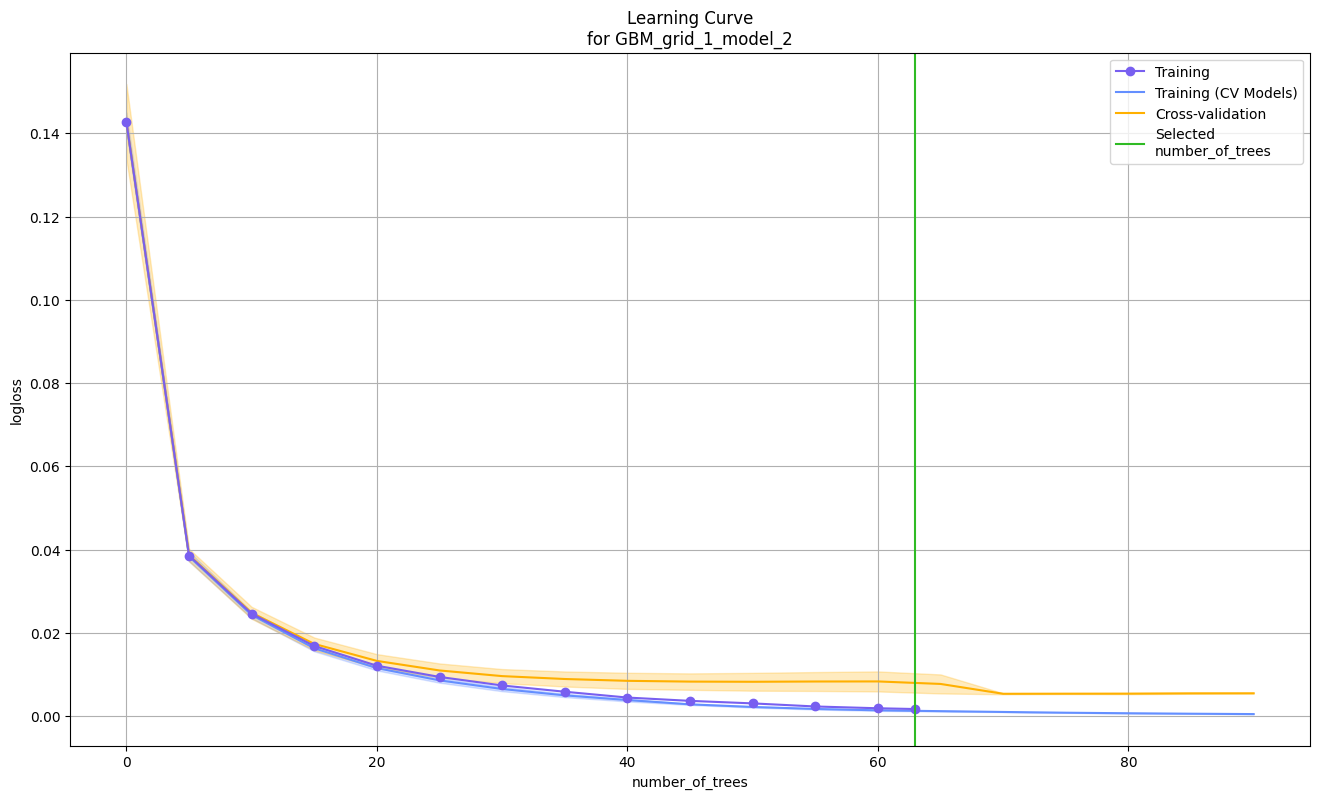

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

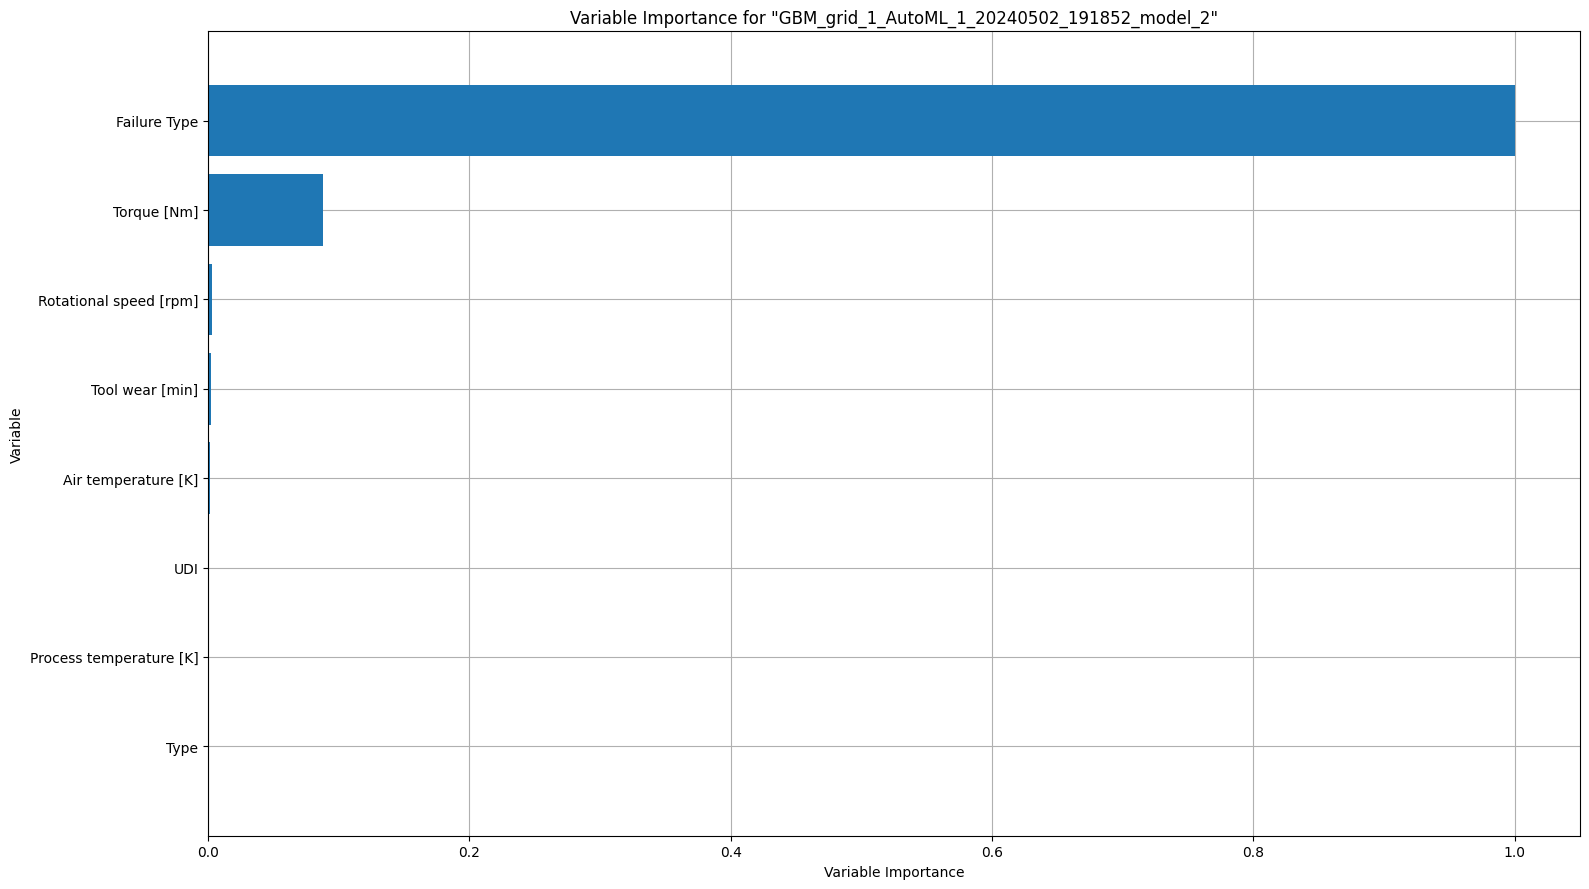

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

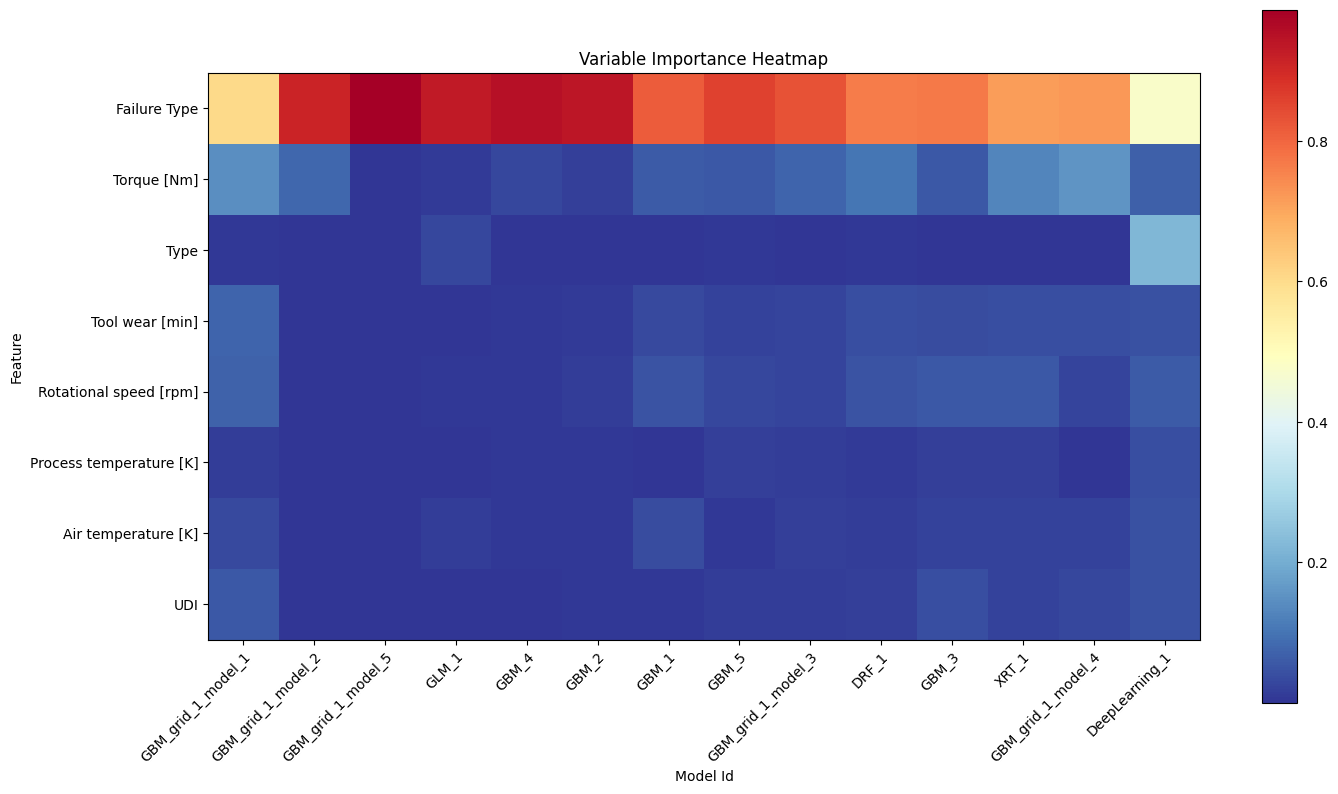

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

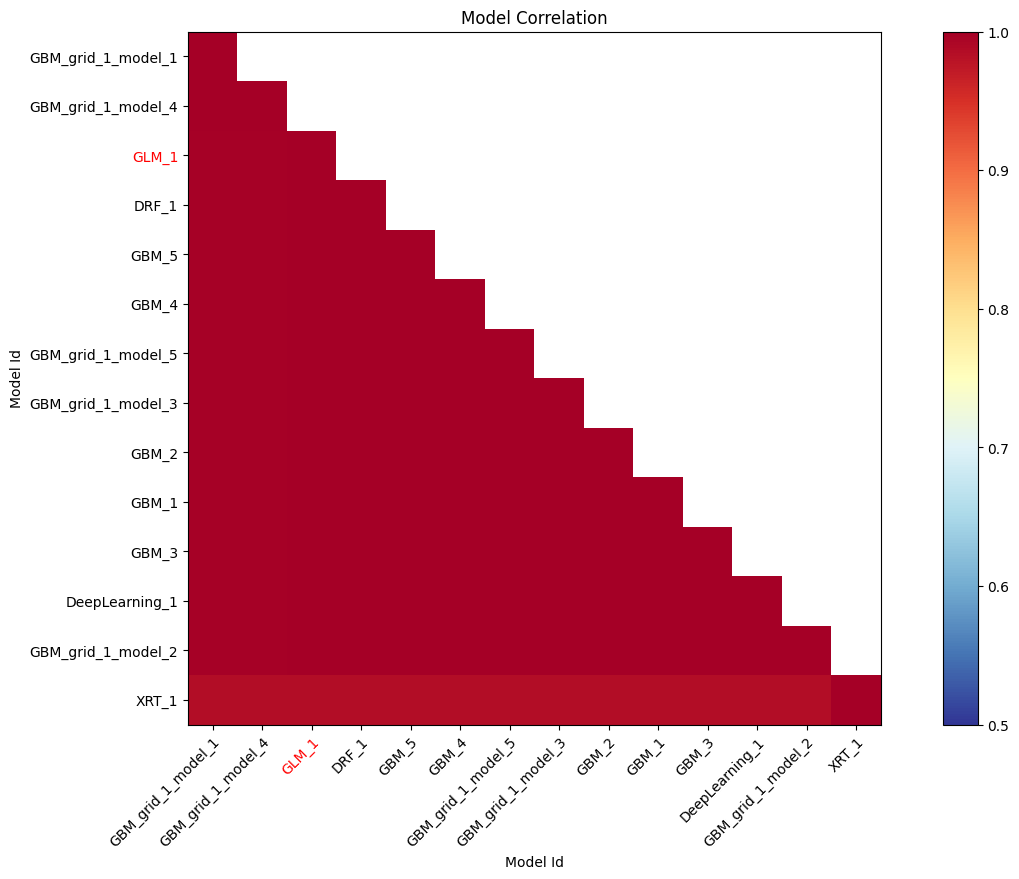

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

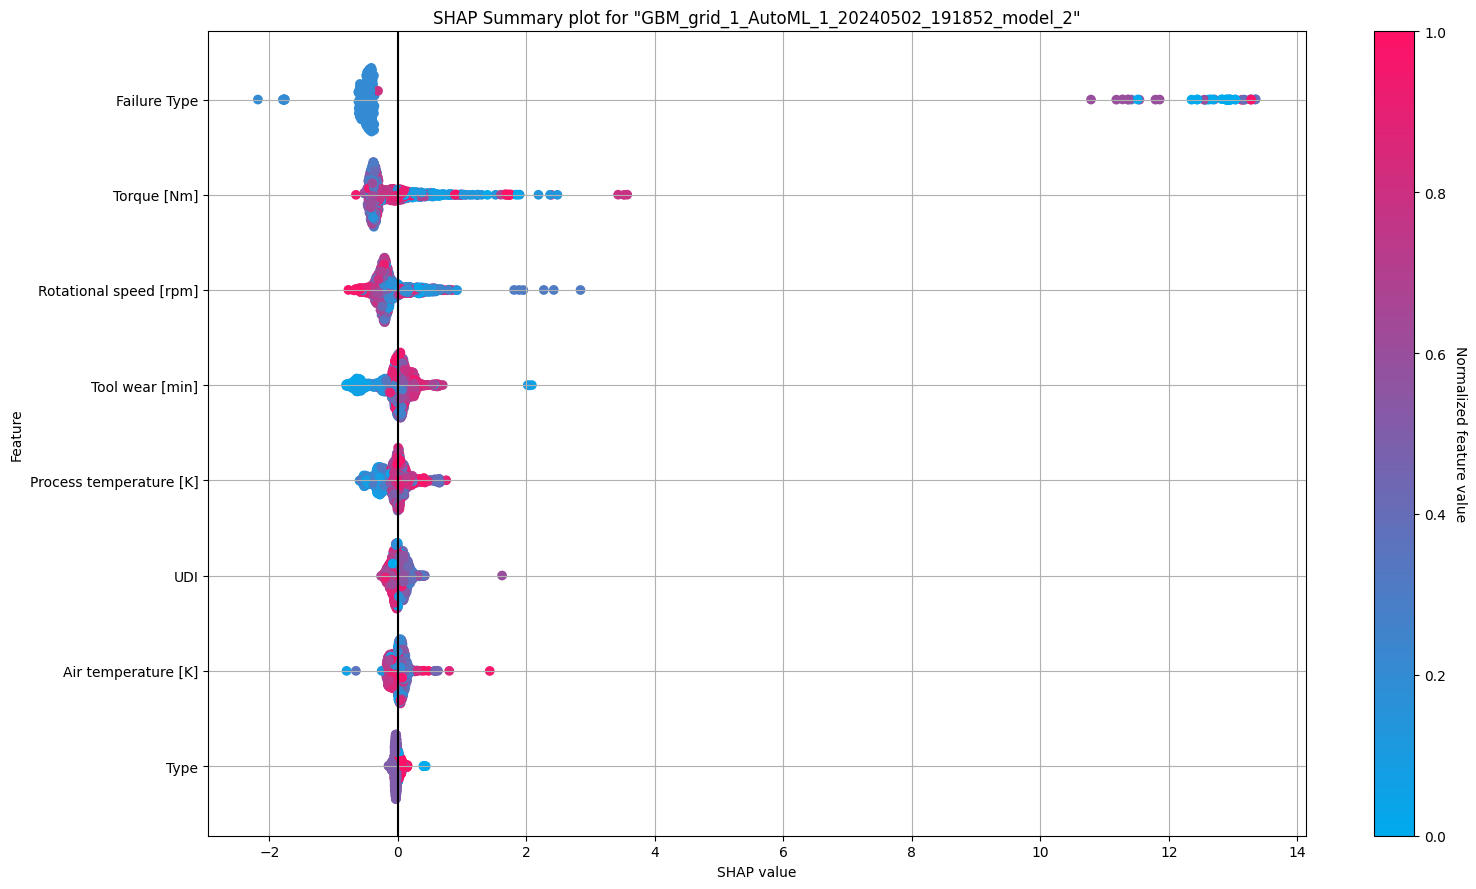

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

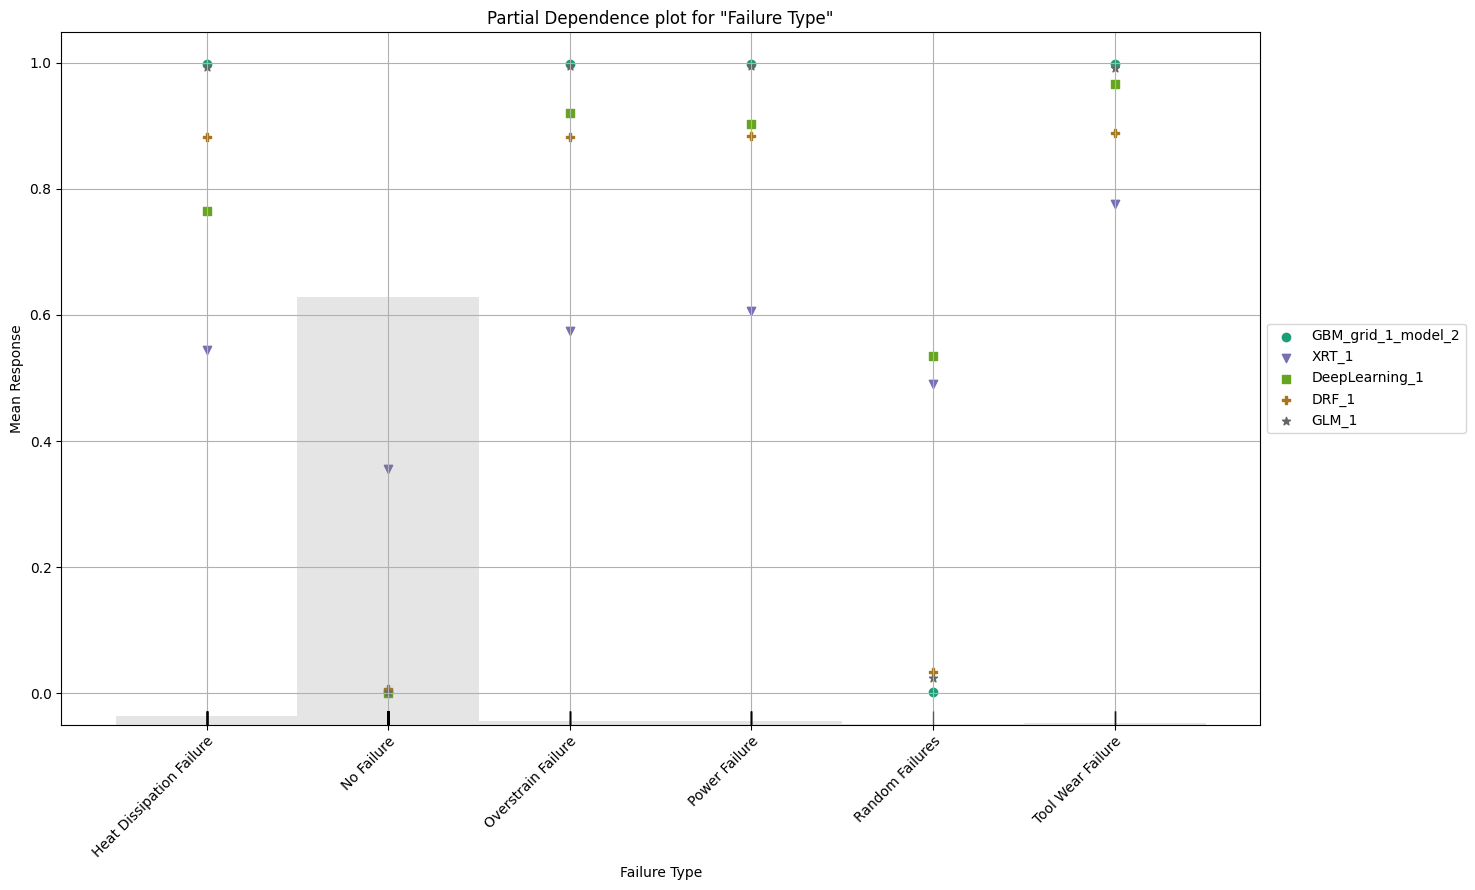

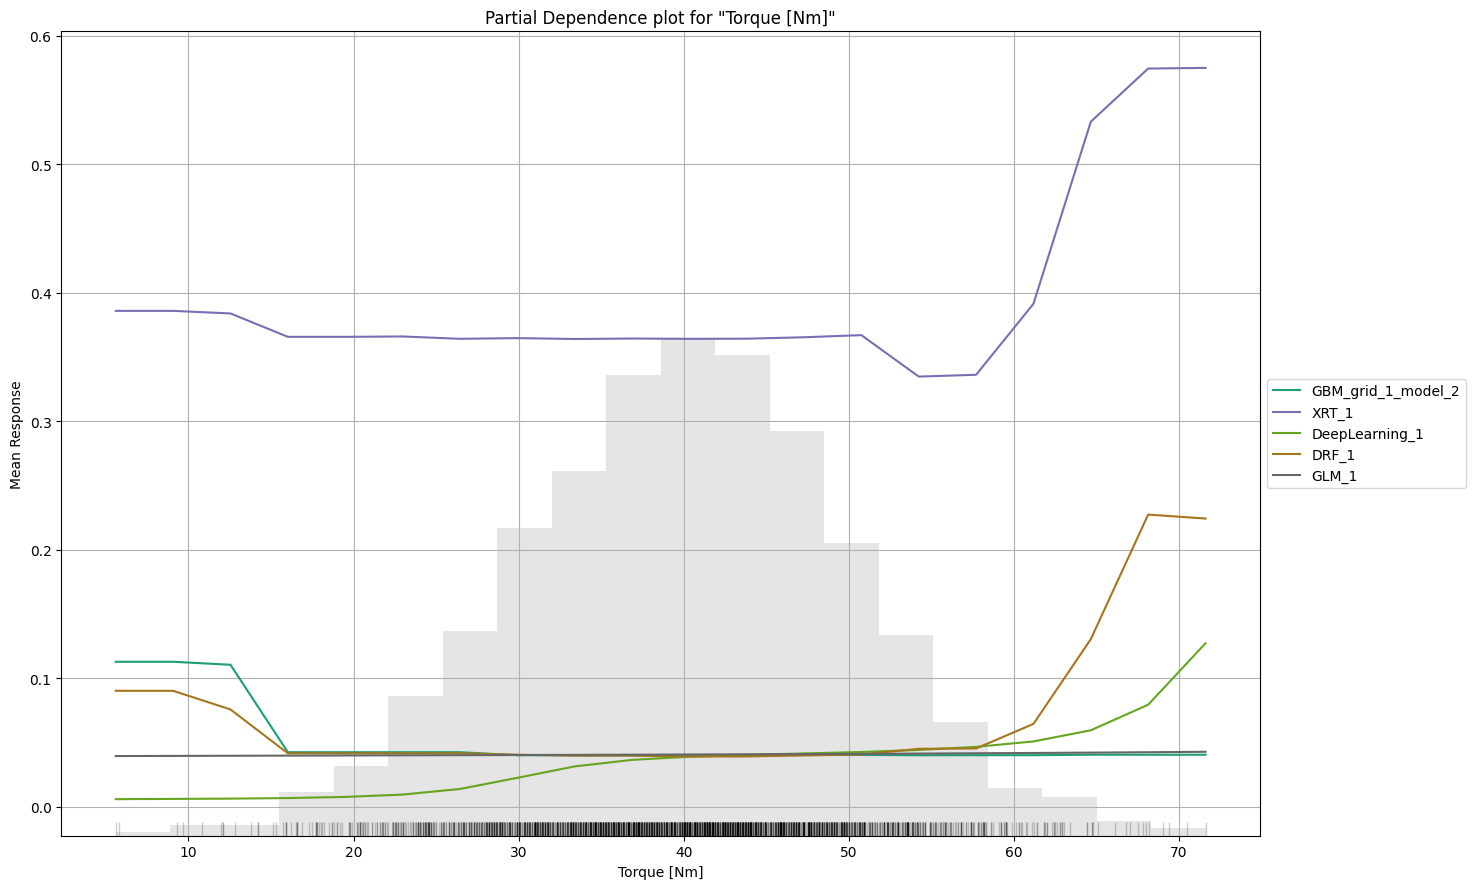

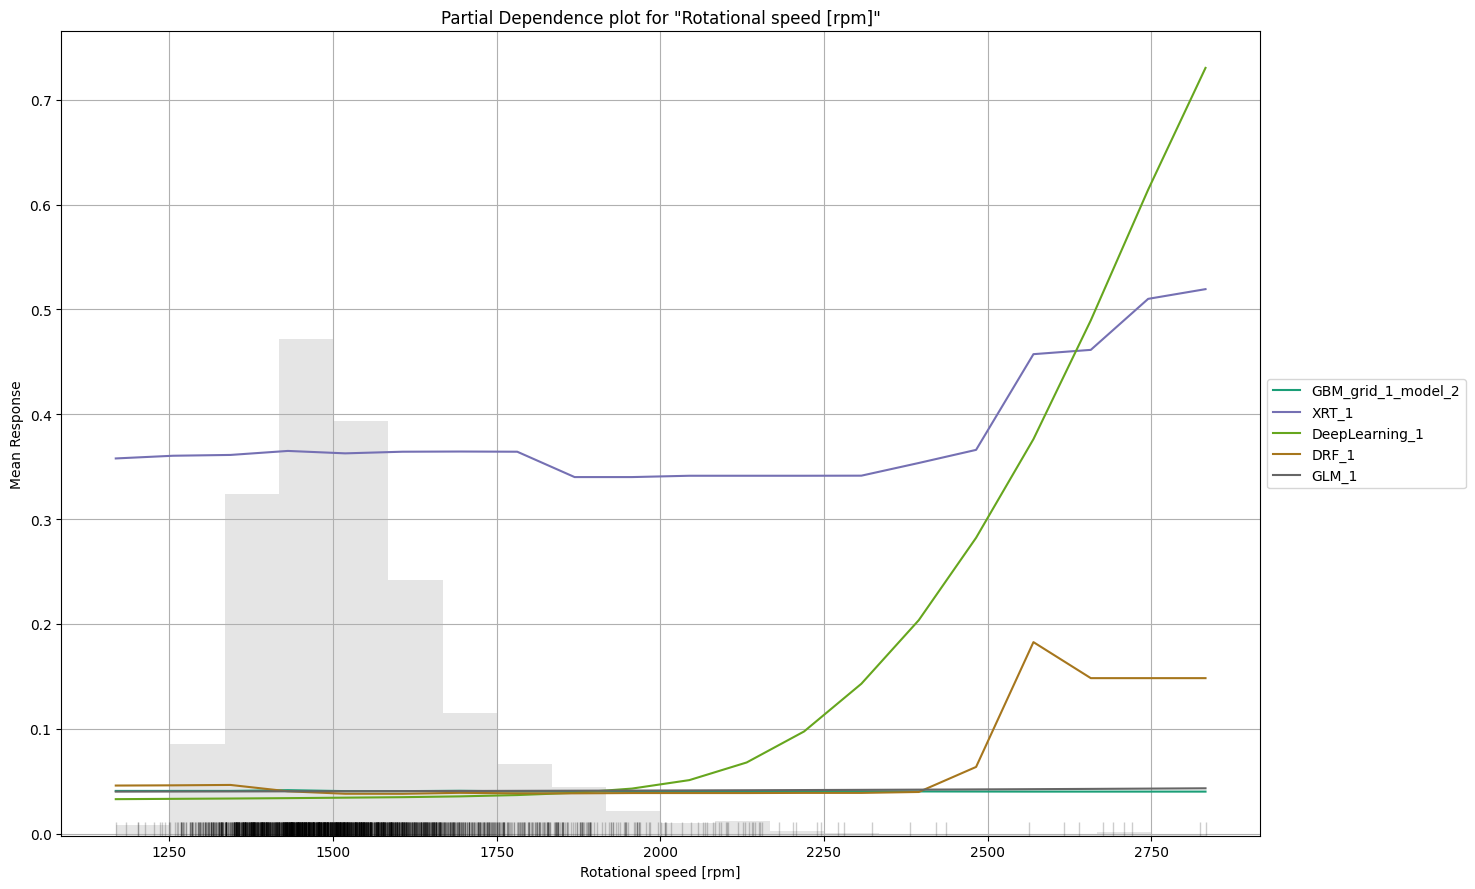

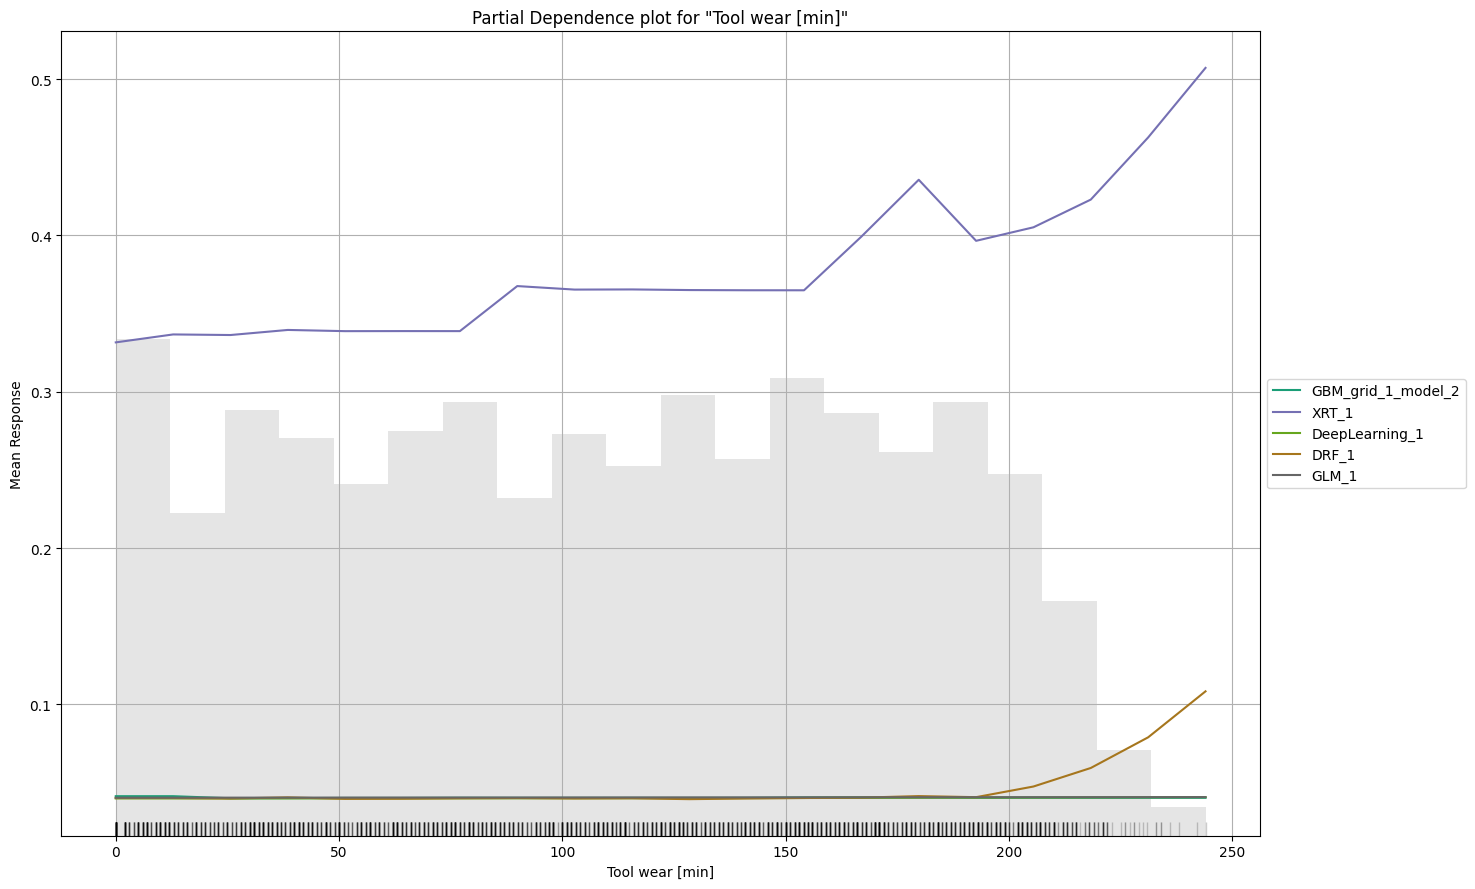

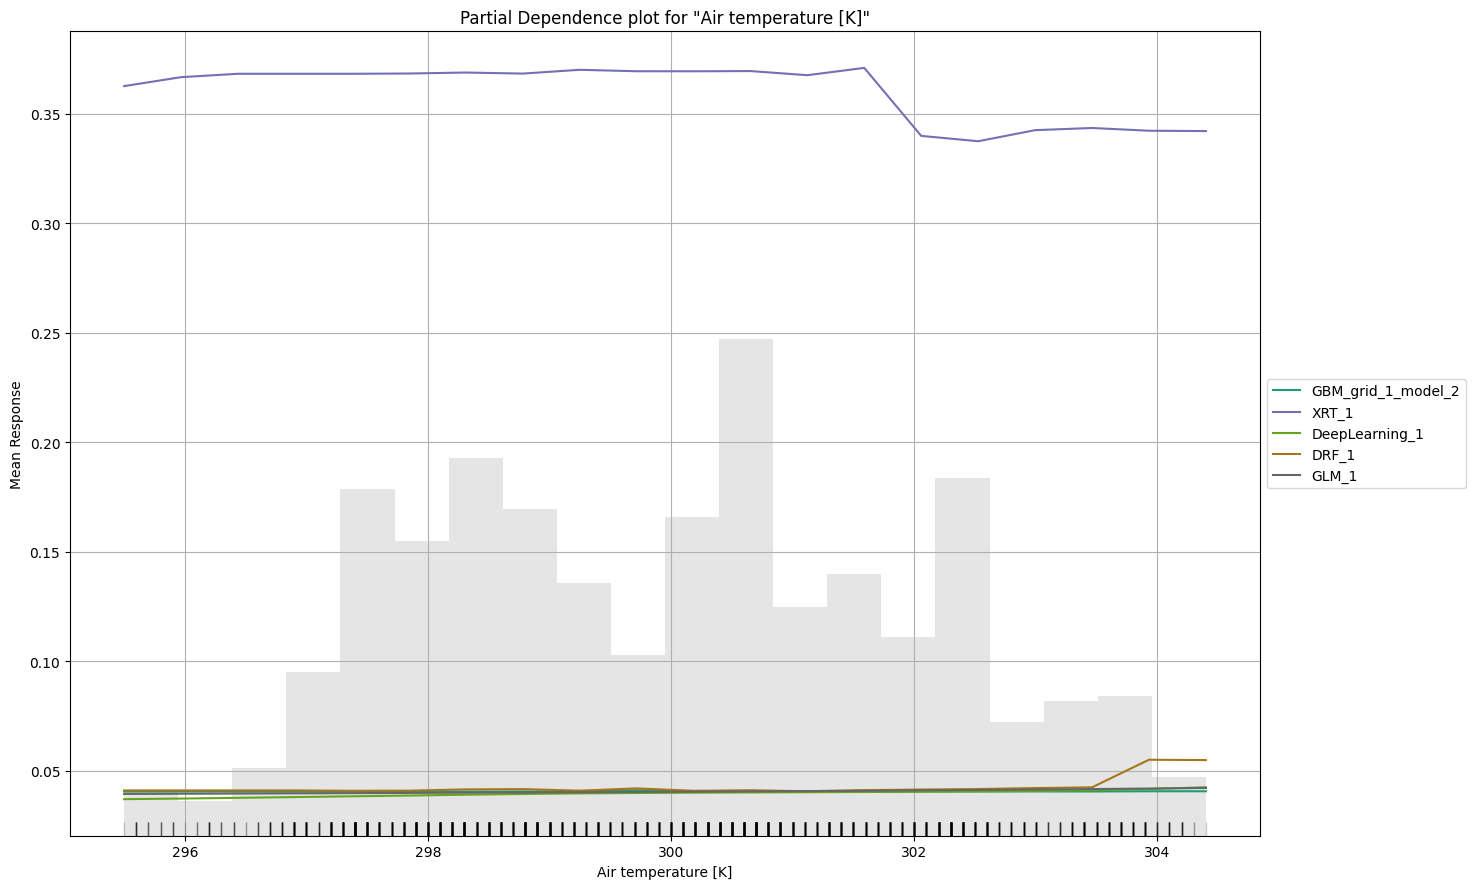

In [18]:
# Descripcion de todos los modelos entrenados
exa = aml.explain(test)

## Análisis de las salidas

Resumen:

- Ranking de modelos: Se muestra un ranking de los modelos entrenados junto con métricas como AUC, logloss, AUCPR, mean_per_class_error, rmse y mse. Estos modelos son clasificados según su rendimiento en estas métricas.
- Descripción de todos los modelos entrenados: Se proporciona una tabla detallada que incluye información sobre cada modelo entrenado, como el ID del modelo, métricas de rendimiento como AUC, logloss, AUCPR, mean_per_class_error, rmse y mse, así como el tiempo de entrenamiento y tiempo de predicción por fila.
- Matriz de confusión: Se muestra la matriz de confusión para uno de los modelos (GBM_grid_1_AutoML_1_20240501_92548_model_3) que muestra la comparación entre las clases reales y las clases predichas.
- Gráfica de Curva de Aprendizaje: Muestra la curva de aprendizaje que representa la pérdida/métrica en función del número de iteraciones o árboles para algoritmos basados en árboles.
- Importancia de variables: Se muestra la importancia relativa de las variables más importantes en el modelo.
- Mapa de calor de Importancia de Variables: Muestra la importancia de las variables a través de varios modelos en forma de mapa de calor.
- Correlación de modelos: Muestra la correlación entre las predicciones de los modelos.
- Resumen SHAP: Muestra la contribución de las características para cada instancia de datos utilizando SHAP (SHapley Additive exPlanations).
- Gráficos de Dependencia Parcial: Muestra la dependencia parcial de las variables, es decir, el efecto marginal de una variable sobre la respuesta.
- Esta salida proporciona una visión completa del proceso de AutoML, incluyendo el rendimiento de los modelos entrenados y diversas herramientas para el análisis y la interpretación de los resultados.

In [19]:
# Performande del mejor modelo
aml.leader.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0005572960752672206
RMSE: 0.023607119164930326
LogLoss: 0.005107931867836915
Mean Per-Class Error: 0.006172839506172839
AUC: 0.993482985653008
AUCPR: 0.9885553400767741
Gini: 0.9869659713060159

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9953612537972515
       No    Sí    Error    Rate
-----  ----  ----  -------  ------------
No     1937  0     0        (0.0/1937.0)
Sí     1     80    0.0123   (1.0/81.0)
Total  1938  80    0.0005   (1.0/2018.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.995361     0.993789  28
max f2                       0.995361     0.990099  28
max f0point5                 0.995361     0.997506  28
max accuracy                 0.995361     0.999504  28
max precision                0.999206     1         0
max recall                   0.000344006  1         316
max specificity              0.999206     1         0
max absolute_mcc             0.995361     0.993552  28
max min_per_class_accuracy   0.995361     0.987654  28
max mean_per_class_accuracy  0.995361     0.993827  28
max tns                      0.999206     1937      0
max fns                      0.999206     80        0
max fps                      0.000104603  1937      399
max tps                      0.000344006  81        316
max tnr                      0.999206     1         0
max fnr                      0.999206     0.987654  0
max fpr                      0.000104603  1         399
max tpr                      0.000344006  1         316

Gains/Lift Table: Avg response rate:  4,01 %, avg score:  4,07 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0104063                   0.998821           24.9136   24.9136            1                0.998867     1                           0.998867            0.259259        0.259259                   2391.36   2391.36            0.259259
2        0.0203171                   0.9988             24.9136   24.9136            1                0.998818     1                           0.998843            0.246914        0.506173                   2391.36   2391.36            0.506173
3        0.0302279                   0.99852            24.9136   24.9136            1                0.998672     1                           0.998787            0.246914        0.753086                   2391.36   2391.36            0.753086
4        0.0401388                   0.163104           23.6679   24.606             0.95             0.960017     0.987654                    0.989214            0.234568        0.987654                   2266.79   2360.6             0.987138
5        0.0500496                   0.00744047         0         19.7335            0                0.042421     0.792079                    0.80173             0               0.987654                   -100      1873.35            0.976813
6        0.100099                    0.00148842         0         9.86676            0                0.00305339   0.39604                     0.402392            0               0.987654                   -100      886.676            0.92467
7        0.150149                    0.00091064         0         6.57784            0                0.00117895   0.264026                    0.268654            0               0.987654                   -100      557.784            0.872528
8        0.200694       

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,No,Sí
GBM_grid_1_AutoML_1_20240502_191852_model_4,0.999481,0.00678408,0.993789,0.00617284,0.0365574,0.00133645,921,0.05318,GBM,No,0.999908,9.2278e-05
GBM_5_AutoML_1_20240502_191852,0.99934,0.0041206,0.993056,0.00617284,0.0222895,0.000496824,545,0.025957,GBM,No,0.999591,0.000409369
GBM_grid_1_AutoML_1_20240502_191852_model_3,0.999114,0.00437309,0.992182,0.00617284,0.0231484,0.000535849,569,0.024635,GBM,No,0.999784,0.000216175
GBM_1_AutoML_1_20240502_191852,0.999082,0.00414841,0.992081,0.00617284,0.0226061,0.000511037,1372,0.049247,GBM,No,0.999435,0.00056489
GBM_grid_1_AutoML_1_20240502_191852_model_1,0.998996,0.00758928,0.99183,0.00617284,0.0363519,0.00132146,1071,0.048456,GBM,No,0.99996,3.95897e-05
GBM_4_AutoML_1_20240502_191852,0.99885,0.00431349,0.991462,0.00617284,0.0223238,0.000498354,707,0.028907,GBM,No,0.999703,0.000297017
GBM_2_AutoML_1_20240502_191852,0.998649,0.00431512,0.991052,0.00617284,0.0223151,0.000497964,705,0.026426,GBM,No,0.999745,0.000255448
DeepLearning_1_AutoML_1_20240502_191852,0.996303,0.00709069,0.989159,0.00617284,0.031106,0.000967585,530,0.016891,DeepLearning,No,0.999991,8.8369e-06
XRT_1_AutoML_1_20240502_191852,0.996115,0.430499,0.977361,0.0246914,0.351629,0.123643,246,0.011504,DRF,No,0.68,0.32
GBM_3_AutoML_1_20240502_191852,0.995902,0.0047636,0.989028,0.00617284,0.02233,0.000498629,681,0.025568,GBM,No,0.999862,0.000137775


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

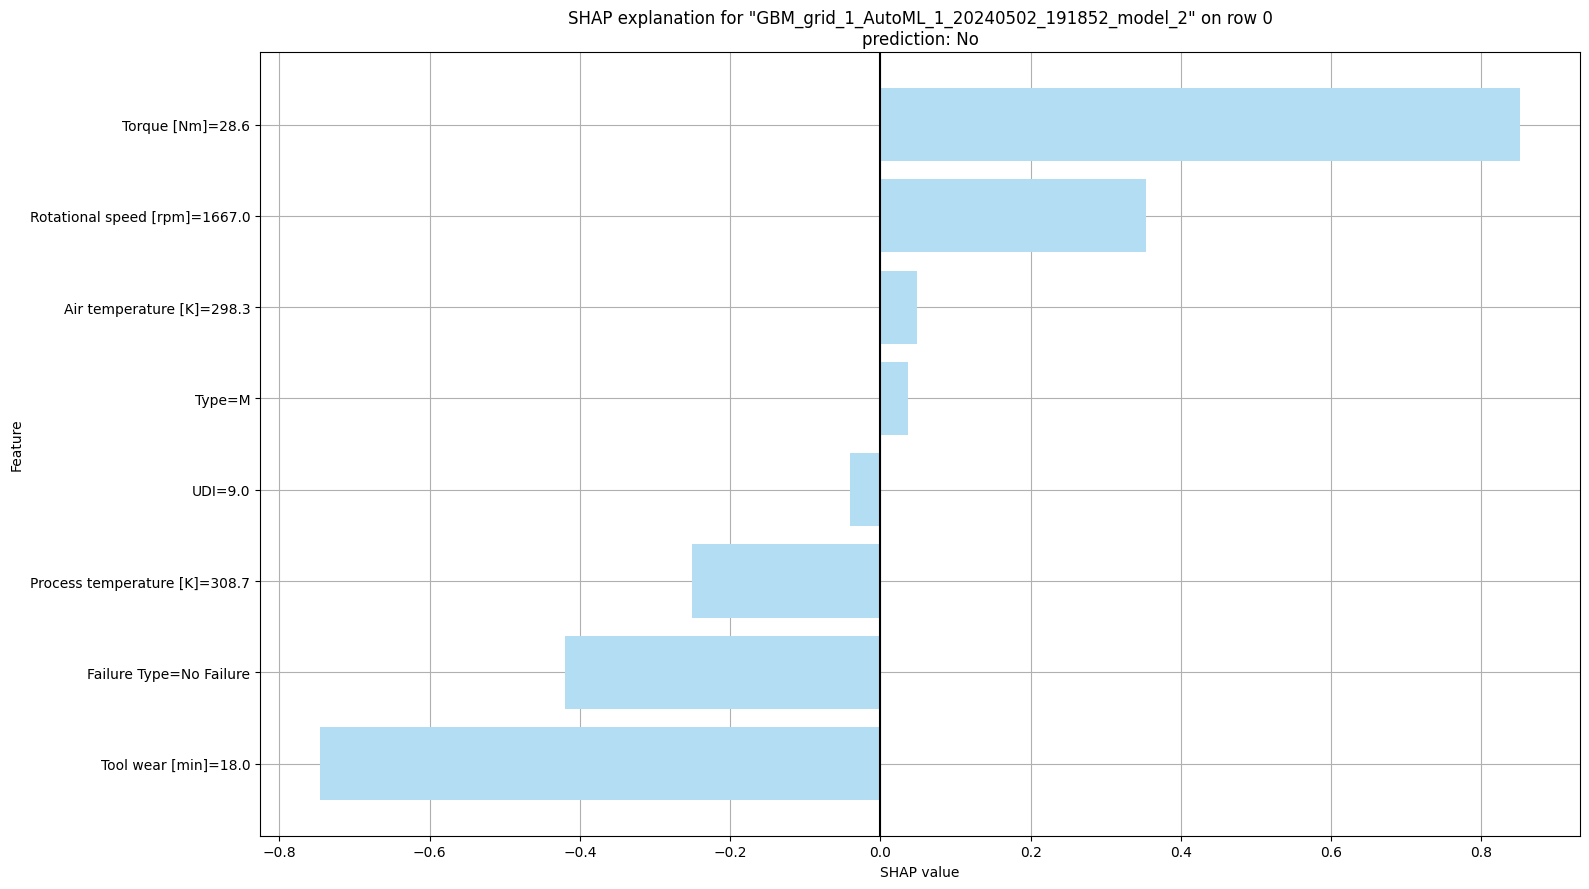

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,No,Sí
GBM_grid_1_AutoML_1_20240502_191852_model_4,0.999481,0.00678408,0.993789,0.00617284,0.0365574,0.00133645,921,0.05318,GBM,No,0.999908,9.2278e-05
GBM_5_AutoML_1_20240502_191852,0.99934,0.0041206,0.993056,0.00617284,0.0222895,0.000496824,545,0.025957,GBM,No,0.999591,0.000409369
GBM_grid_1_AutoML_1_20240502_191852_model_3,0.999114,0.00437309,0.992182,0.00617284,0.0231484,0.000535849,569,0.024635,GBM,No,0.999784,0.000216175
GBM_1_AutoML_1_20240502_191852,0.999082,0.00414841,0.992081,0.00617284,0.0226061,0.000511037,1372,0.049247,GBM,No,0.999435,0.00056489
GBM_grid_1_AutoML_1_20240502_191852_model_1,0.998996,0.00758928,0.99183,0.00617284,0.0363519,0.00132146,1071,0.048456,GBM,No,0.99996,3.95897e-05
GBM_4_AutoML_1_20240502_191852,0.99885,0.00431349,0.991462,0.00617284,0.0223238,0.000498354,707,0.028907,GBM,No,0.999703,0.000297017
GBM_2_AutoML_1_20240502_191852,0.998649,0.00431512,0.991052,0.00617284,0.0223151,0.000497964,705,0.026426,GBM,No,0.999745,0.000255448
DeepLearning_1_AutoML_1_20240502_191852,0.996303,0.00709069,0.989159,0.00617284,0.031106,0.000967585,530,0.016891,DeepLearning,No,0.999991,8.8369e-06
XRT_1_AutoML_1_20240502_191852,0.996115,0.430499,0.977361,0.0246914,0.351629,0.123643,246,0.011504,DRF,No,0.68,0.32
GBM_3_AutoML_1_20240502_191852,0.995902,0.0047636,0.989028,0.00617284,0.02233,0.000498629,681,0.025568,GBM,No,0.999862,0.000137775


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

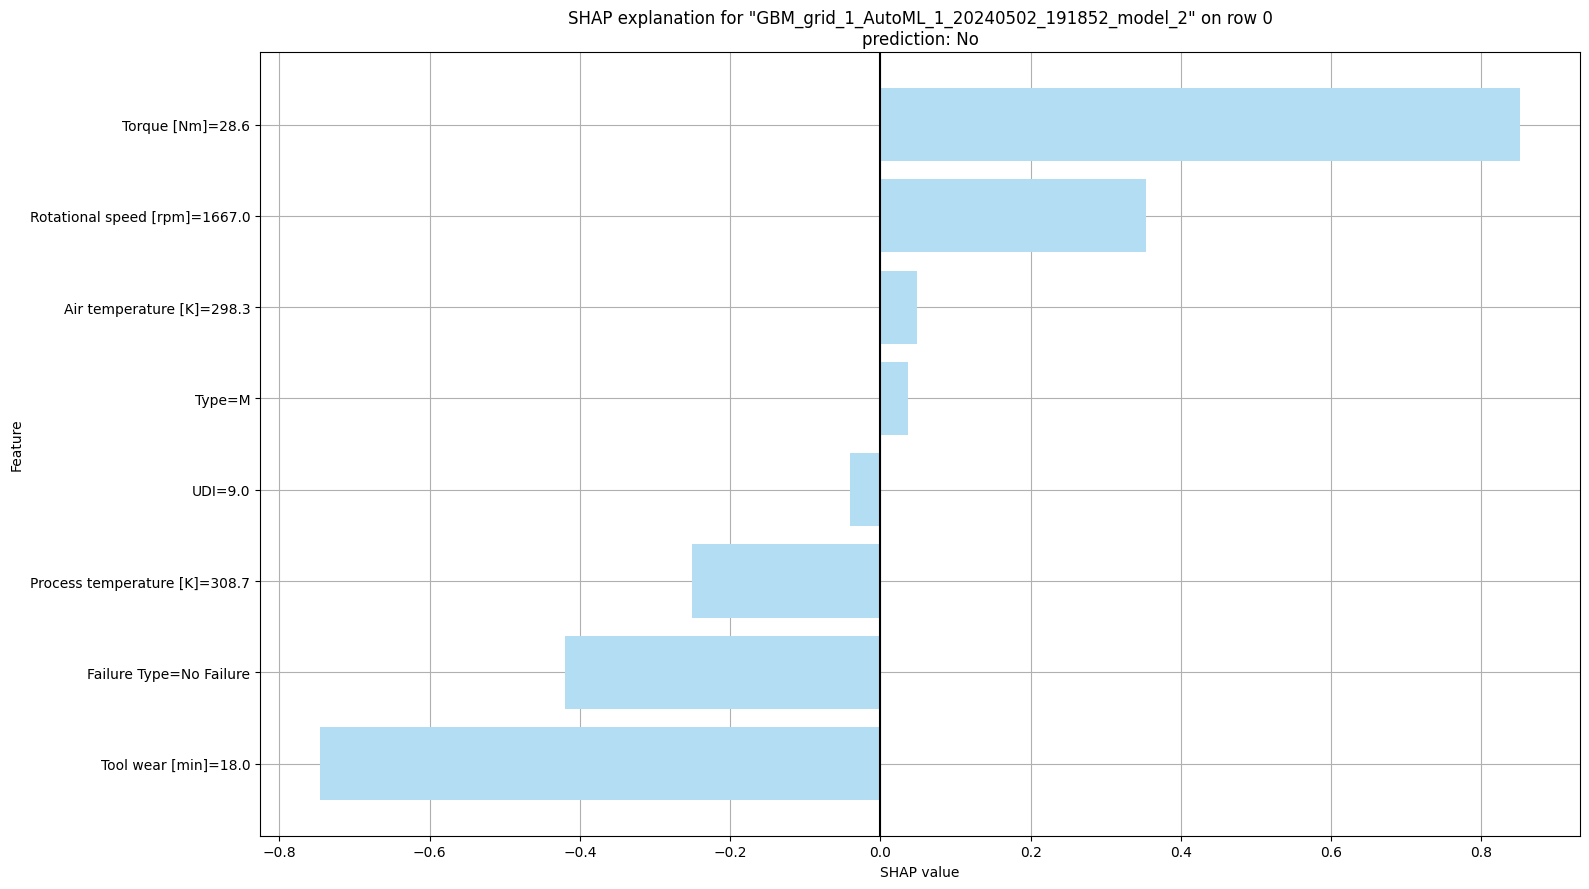

In [20]:
# Descripcion de la prediccion de un ejemplo
aml.explain_row(test, row_index=0)

## Análisis sobre el conjunto de prueba

El rendimiento del modelo líder parece ser excelente, con valores muy cercanos a 1 en todas las métricas, lo que indica un modelo altamente preciso y bien ajustado a los datos de prueba.

## Predicción

In [21]:
# Convertir nuevos datos a un H2OFrame
new_data = h2o.H2OFrame(test)

# Hacer predicciones
predictions = aml.leader.predict(new_data)

# Visualizar las predicciones
predictions

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,No,Sí
No,0.999174,0.000826034
No,0.999704,0.000296498
No,0.999495,0.000504508
No,0.999332,0.000667589
No,0.99927,0.000730075
No,0.998255,0.00174533
No,0.998594,0.00140551
No,0.999436,0.000563945
No,0.999647,0.000353191
No,0.999304,0.00069582


## Metricas

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Verdaderos valores de las etiquetas
true_labels = df_test['Target'].values

# Predicciones del modelo
predicted_labels = predictions.as_data_frame().predict.values  # Suponiendo que 'predictions' es un dataframe de pandas

# Codificar las etiquetas verdaderas y las predicciones a valores numéricos
label_encoder = LabelEncoder()
true_labels_numeric = label_encoder.fit_transform(true_labels)
predicted_labels_numeric = label_encoder.transform(predicted_labels)

# Calcular métricas
accuracy = accuracy_score(true_labels_numeric, predicted_labels_numeric)
precision = precision_score(true_labels_numeric, predicted_labels_numeric)
recall = recall_score(true_labels_numeric, predicted_labels_numeric)
f1 = f1_score(true_labels_numeric, predicted_labels_numeric)
auc_roc = roc_auc_score(true_labels_numeric, predicted_labels_numeric)

# Imprimir resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", auc_roc)

Accuracy: 0.9990089197224975
Precision: 0.9876543209876543
Recall: 0.9876543209876543
F1 Score: 0.9876543209876543
AUC-ROC Score: 0.9935690293632128


C:\Users\Josvaldes\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
